In [69]:
local_data_dir = '/Users/shanydanieli/projects/merian/observing/data/'

In [70]:
import numpy as np
import healpy as hp

import matplotlib.pyplot as plt
from matplotlib import patches

from astropy import coordinates
from astropy import units as u
from astropy.io import fits

from shapely import geometry
from shapely.ops import unary_union
from shapely.geometry import Point
from descartes.patch import PolygonPatch

from skipper import shape, hsc

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
def get_concave_shape(ra, dec, ralow, raup, alpha):
    ra_chosen = [x for x in ra if ralow<x<raup]
    dec_chosen = [dec[i] for i in range(len(dec)) if ralow<ra[i]<raup]
    coor = np.vstack((ra_chosen,dec_chosen)).T
    field_edges = shape.concave_hull(coor, alpha=alpha)
    return field_edges

## Generate and save the HSC-SSP S18A and S20A covered fields borders

### HSC-SSP PDR2 (S18A)

In [73]:
# read the healpy map of the S18A data release
mask = hp.read_map(local_data_dir+'s18a_fdfc_hp_contarea.fits', nest=True, dtype = np.bool)
indices_map = np.where(mask)[0]
nside = hp.get_nside(mask)

# read the random catalog in the i-band only
hdul = fits.open(local_data_dir+'/merian_random_iband_only_1.fits')
randoms_data = hdul[1].data

filtered_catalog = hsc.filter_healpix_mask(mask,randoms_data)
ra_s18a = filtered_catalog['ra']
dec_s18a = filtered_catalog['dec']


# 11127341/42406457 objects are selected by the mask


### GAMA09 and GAMA12 fields, both available during the Spring observing run

In [77]:
alpha = 1

# gama09_edges_S18A = get_concave_shape(ra_s18a, dec_s18a, 120, 160, alpha=alpha)
# np.savetxt('../data/gama09_edges_S18A.dat', gama09_edges_S18A)
# gama12_edges_S18A = get_concave_shape(ra_s18a, dec_s18a, 161, 200, alpha=alpha)
# np.savetxt('../data/gama12_edges_S18A.dat', gama12_edges_S18A)
gama15_edges_S18A = get_concave_shape(ra_s18a, dec_s18a, 201, 250, alpha=alpha)
np.savetxt('../data/gama15_edges_S18A.dat', gama15_edges_S18A)





### HSC-SSP S20A

In [74]:
HSC_S20_fdfc = hp.read_map('../data/s20a_fdfc_hp_contarea_izy-gt-5.fits', nest=True, dtype=np.bool)
filtered_catalog = hsc.filter_healpix_mask(HSC_S20_fdfc,randoms_data)
ra_s20a = filtered_catalog['ra']
dec_s20a = filtered_catalog['dec']

# 19827548/42406457 objects are selected by the mask


In [75]:
# gama09_edges_S20A = get_concave_shape(ra_s20a, dec_s20a, 120, 153, alpha=alpha)
# np.savetxt('../data/gama09_edges_S20A.dat', gama09_edges_S20A)

# all of the G09, G12, and G15 fields
gama_edges_S20A = get_concave_shape(ra_s20a, dec_s20a, 120, 250, alpha=alpha)
np.savetxt('../data/gama_edges_S20A.dat', gama_edges_S20A)

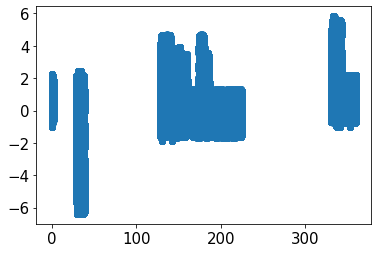

In [67]:
plt.scatter(ra_s20a,dec_s20a)

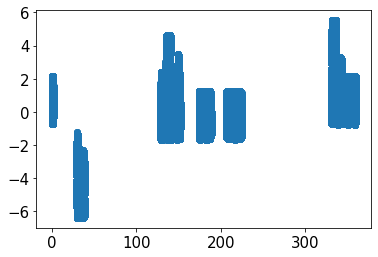

In [68]:
plt.scatter(ra_s18a,dec_s18a)